In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import requests
from collections import defaultdict
from datetime import date, datetime
from config import api_key

In [2]:
crimefile = "HPDcrimes.csv"
combined_crime_df = pd.read_csv(crimefile)
combined_crime_df.head()

,Unnamed: 0,Occurrence_Date,Occurrence_Hour,NIBRS_Description,Offense_Count,Beat,Premise,Block_Range,Street_Name,Street_Type,Suffix
0,0,12/2/14,16.0,Aggravated Assault,1.0,10H10,"Road, Street, or Sidewalk",200-299,BRYAN,-,-
1,1,12/8/14,6.0,Theft,1.0,10H10,Driveway,200-299,LINWOOD,-,-
2,2,12/8/14,19.0,Burglary,1.0,10H10,Apartment Parking Lot,2800-2899,CANAL,ST,-
3,3,12/29/14,15.0,Auto Theft,1.0,10H10,"Road, Street, or Sidewalk",100-199,BASTROP,ST,-
4,4,12/30/14,7.0,Burglary,1.0,10H10,Restaurant or Cafeteria,2700-2799,NAVIGATION,-,-


In [3]:
# Set index to Occurrence Date to use loc
dui_number_df = combined_crime_df.set_index("Occurrence_Date")
dui_number_df.head()

,Unnamed: 0,Occurrence_Hour,NIBRS_Description,Offense_Count,Beat,Premise,Block_Range,Street_Name,Street_Type,Suffix
Occurrence_Date,,,,,,,,,,
12/2/14,0,16.0,Aggravated Assault,1.0,10H10,"Road, Street, or Sidewalk",200-299,BRYAN,-,-
12/8/14,1,6.0,Theft,1.0,10H10,Driveway,200-299,LINWOOD,-,-
12/8/14,2,19.0,Burglary,1.0,10H10,Apartment Parking Lot,2800-2899,CANAL,ST,-
12/29/14,3,15.0,Auto Theft,1.0,10H10,"Road, Street, or Sidewalk",100-199,BASTROP,ST,-
12/30/14,4,7.0,Burglary,1.0,10H10,Restaurant or Cafeteria,2700-2799,NAVIGATION,-,-


In [4]:
#Find DUI numbers for thankgiving, christmas and new years
thkg_stats = dui_number_df.loc['2018-11-22', "NIBRS_Description"].value_counts()
dui_numbers = thkg_stats.loc["Driving under the influence"]
xmas_stats = dui_number_df.loc['2018-12-25', "NIBRS_Description"].value_counts()
dui_numbers2 = xmas_stats.loc["Driving under the influence"]
nyr_stats = dui_number_df.loc['2019-01-01', "NIBRS_Description"].value_counts()
dui_numbers3 = nyr_stats.loc["Driving under the influence"]
print(f"Number of DUIs on Thanksgiving, Christmas and New Year's is")
print(dui_numbers, dui_numbers2, dui_numbers3)

Number of DUIs on Thanksgiving, Christmas and New Year's is
18 24 32


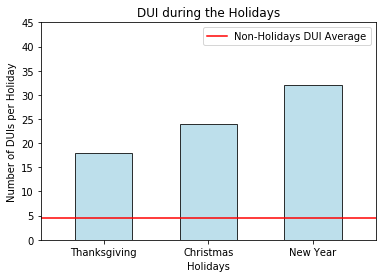

In [5]:
#home_HDay_ratios = [Crimes_home_ThkgRate, Crimes_home_XmasRate, Crimes_home_Nyr]
dui_totals = [dui_numbers, dui_numbers2, dui_numbers3]
x_axis = ["Thanksgiving", "Christmas", "New Year"]

# Setting our x and y limits
plt.xlim(-0.6, 2.6)
plt.ylim(0, 45)
NumberofDUI = (combined_crime_df[combined_crime_df.NIBRS_Description=='Driving under the influence'].Premise.count()/450)

plt.bar(x_axis, dui_totals, color='lightblue', alpha=0.8, edgecolor='black', align="center", width=0.55)

plt.axhline(y=NumberofDUI, label = 'Non-Holidays DUI Average', c = 'red')

# The legend for chart
plt.title("DUI during the Holidays")
plt.xlabel("Holidays")
plt.ylabel("Number of DUIs per Holiday")

plt.legend(loc="upper right")
plt.show()

In [6]:
NumberofDUI = (combined_crime_df[combined_crime_df.NIBRS_Description=='Driving under the influence'].Premise.count()/450)
NumberofDUI


4.533333333333333

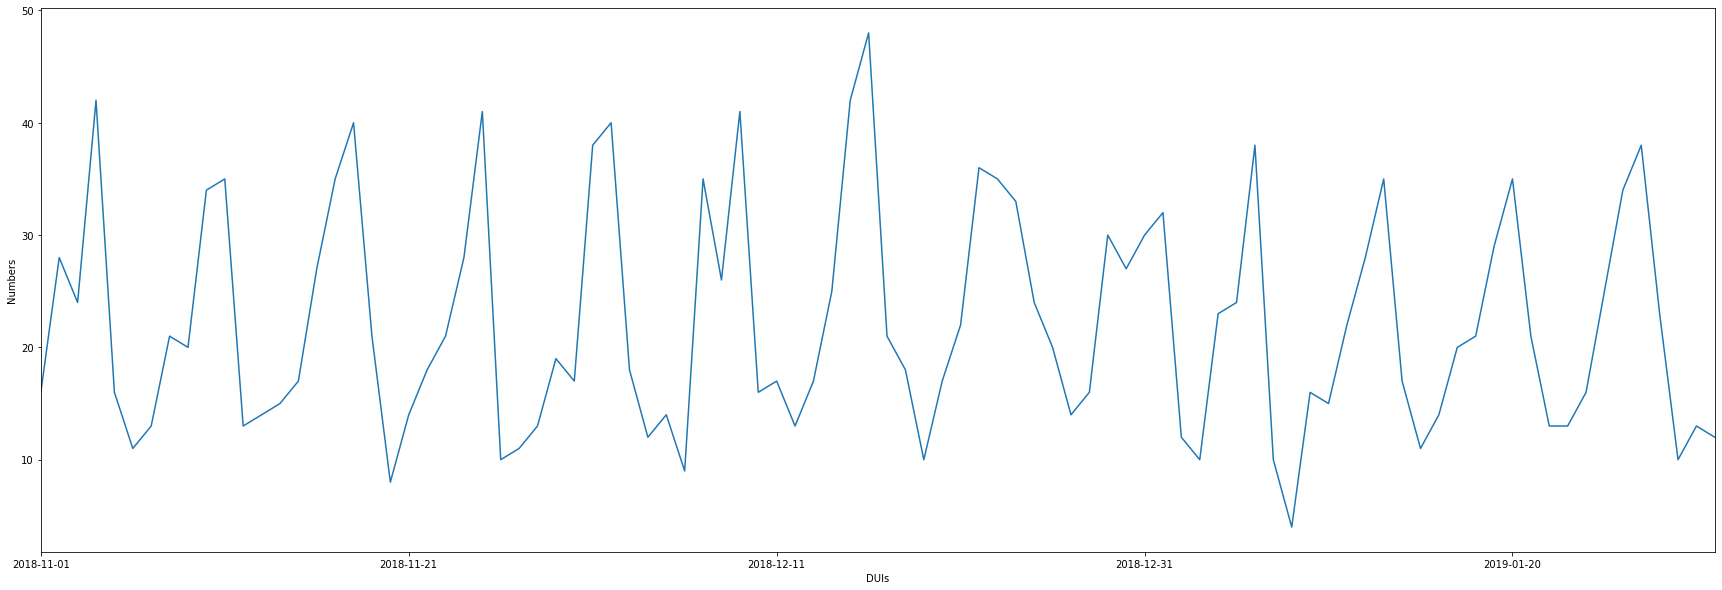

In [7]:
chart01 = dui_number_df[dui_number_df['NIBRS_Description'] == 'Driving under the influence'].groupby('Occurrence_Date')['Offense_Count'].count().plot(figsize=(30,10))
chart01.set_xlabel("DUIs")
chart01.set_ylabel("Numbers")
plt.show()

In [8]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=DJI&outputsize=full&apikey={api_key}"

In [9]:
response = requests.get(url)
response_json = response.json()
response_json.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [10]:
daily_time_series = response_json['Time Series (Daily)']

daily_lows = defaultdict(list)
for day, day_data in daily_time_series.items():
    daily_lows['date'].append(datetime.strptime(day, '%Y-%m-%d'))
    daily_lows['low'].append(day_data['4. close'])

dts_df = pd.DataFrame(daily_lows)
dts_df.head()   

,date,low
0,2019-09-09,26804.6699
1,2019-09-06,26797.4609
2,2019-09-05,26728.1504
3,2019-09-04,26355.4707
4,2019-09-03,26118.0195


In [11]:
daily_time_series['2019-09-06'].keys()

dict_keys(['1. open', '2. high', '3. low', '4. close', '5. adjusted close', '6. volume', '7. dividend amount', '8. split coefficient'])

In [12]:
dts_df = dts_df.sort_values(by=['date'], ascending=True)
dts_df.head()

,date,low
4951,2000-01-03,11357.5098
4950,2000-01-04,10997.9297
4949,2000-01-05,11122.6504
4948,2000-01-06,11253.2598
4947,2000-01-07,11522.5596


In [13]:
start_date = datetime(2018, 11, 1)
end_date = datetime(2019, 1, 31)
interval_df = dts_df[(dts_df['date'] >= start_date) & (dts_df['date'] <= end_date)]
interval_df.head()

,date,low
212,2018-11-01,25380.7402
211,2018-11-02,25270.8301
210,2018-11-05,25461.6992
209,2018-11-06,25635.0098
208,2018-11-07,26180.3008


In [14]:
dui_df = dui_number_df[dui_number_df['NIBRS_Description'] == 'Driving under the influence'].groupby('Occurrence_Date')['Offense_Count'].count().to_frame()
dui_df.reset_index(inplace=True)
dui_df['Occurrence_Date'] = pd.to_datetime(dui_df['Occurrence_Date'])
dui_df.head()

,Occurrence_Date,Offense_Count
0,2018-11-01,16
1,2018-11-02,28
2,2018-11-03,24
3,2018-11-04,42
4,2018-11-05,16


In [15]:
dui_msft_merged = dui_df.merge(interval_df, left_on=['Occurrence_Date'], right_on=['date'], how='right')
dui_msft_merged

,Occurrence_Date,Offense_Count,date,low
0,2018-11-01,16,2018-11-01,25380.7402
1,2018-11-02,28,2018-11-02,25270.8301
2,2018-11-05,16,2018-11-05,25461.6992
3,2018-11-06,11,2018-11-06,25635.0098
4,2018-11-07,13,2018-11-07,26180.3008
5,2018-11-08,21,2018-11-08,26191.2207
6,2018-11-09,20,2018-11-09,25989.3008
7,2018-11-12,13,2018-11-12,25387.1797
8,2018-11-13,14,2018-11-13,25286.4902
9,2018-11-14,15,2018-11-14,25080.5000


<Figure size 432x288 with 0 Axes>

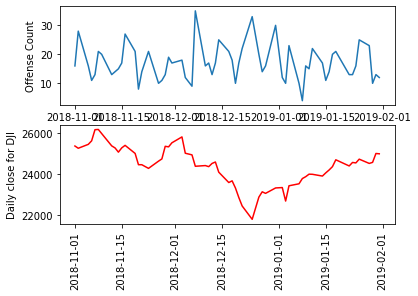

In [16]:
#plt.plot(dui_msft_merged['date'], dui_msft_merged['low'])
#plt.plot(dui_msft_merged['Occurrence_Date'], dui_msft_merged['Offense_Count'])
dui_msft_merged['low']=dui_msft_merged['low'].astype(float)
#dui_msft_merged.plot(x='Occurrence_Date', y=['Offense_Count', 'low'])

plt.figure()
f, axes = plt.subplots(2, 1)
axes[0].plot(dui_msft_merged['Occurrence_Date'], dui_msft_merged['Offense_Count'])
axes[0].set_ylabel('Offense Count')

axes[1].plot(dui_msft_merged['date'], dui_msft_merged['low'], 'r')
axes[1].set_ylabel('Daily close for DJI')
plt.xticks(rotation='vertical')

plt.savefig("Daily_close_for_DJI.png")
plt.show()

In [17]:
combined_crime_df['Premise'].unique()

array(['Road, Street, or Sidewalk', 'Driveway', 'Apartment Parking Lot',
       'Restaurant or Cafeteria', 'Residence or House',
       'Convenience Store Parking Lot', 'Bar or Night Club', 'Apartment',
       'Convenience Store', 'Factory, Manufacturing, or Industrial',
       'Warehouse', 'Garage or Carport',
       'Restaurant or Cafeteria Parking Lot',
       'Miscellaneous Business (Non-Specific)',
       'Field, Woods, Forest, Park', 'Other Parking Lot',
       'Vacant Single Occ Resd(House,Townhs,Dplex)',
       'Other, Unknown, or Not Listed',
       'Vacant Other Out Build/Monument/UnderConst',
       'Grocery Store or Supermarket', 'Commercial Parking Lot or Garage',
       'Vacant Other Residential (Apartment,Dorms)',
       'Grocery Store or Supermarket Parking Lot',
       'Bar or Night Club Parking Lot',
       'Strip Business Center Parking Lot',
       'Department or Discount Store', 'Hotel or Motel Parking Lot',
       'Office Building', nan, 'Freeway Service Road',
  

In [18]:
combined_crime_df.Premise.count()

181724

In [19]:
combined_crime_df.groupby('Premise').Premise.count()

Premise
ATM Separate from Bank                           53
Abandoned/Condemned Structure                    22
Adult Book Store or Newsstand                    26
Adult Novelty Store                               7
Adult Theater/Arcade                              2
Airplane, Bus,Train Terminal                    560
Airport Terminal                                566
Alley                                            57
Amusement Park                                   11
Amusement Park, Bowling Alley, Skate Rink        67
Apartment                                     12064
Apartment Laundry                                63
Apartment Parking Lot                         13917
Apartment Rental Office                         344
Arena/Stadium/Fairgrounds/Coliseum               50
Auto Dealership New/Used                        224
Auto Repair                                     406
Bank                                            227
Bank or Savings Institution Parking Lot         300
Bank

In [20]:
#Total Crimes 3 mos
combined_crime_df.Premise.count()

181724

In [21]:
#Total Residential Crimes 3 mos
combined_crime_df[combined_crime_df.Premise=='Residence, Home (Includes Apartment)'].Premise.count()

20771

In [22]:
#Ratio of residential crimes to other premises 3 mos
Crimes_home_Average = 100*combined_crime_df[combined_crime_df.Premise=='Residence, Home (Includes Apartment)'].Premise.count() / combined_crime_df.Premise.count()
Crimes_home_Average

11.429970724835465

In [23]:
#Total Crimes all premises Tnkg
combined_crime_df[combined_crime_df.Occurrence_Date=='2018-11-22'].Premise.count()

523

In [24]:
#Total Crimes all premises Xmas
combined_crime_df[combined_crime_df.Occurrence_Date=='2018-12-24'].Premise.count()

606

In [25]:
#Total Crimes all premises Nyr
combined_crime_df[combined_crime_df.Occurrence_Date=='2019-01-01'].Premise.count()

723

In [26]:
#Residential Crime numbers on Holidays
Xmas_no = dui_number_df.loc['2018-12-25', "Premise"].value_counts()
Xmas_home_crimes = Xmas_no.loc['Residence, Home (Includes Apartment)']
Thkg_no = dui_number_df.loc['2018-11-22', "Premise"].value_counts()
Thkg_home_crimes = Thkg_no.loc['Residence, Home (Includes Apartment)']
Nyr_no = dui_number_df.loc['2019-01-01', "Premise"].value_counts()
Nyr_home_crimes = Nyr_no.loc['Residence, Home (Includes Apartment)']

print(f"Number of Residential Crimes on Thanksgiving, Christmas and New Year's respectively: ")
print(Thkg_home_crimes, Xmas_home_crimes, Nyr_home_crimes)

Number of Residential Crimes on Thanksgiving, Christmas and New Year's respectively: 
243 270 314


In [27]:
#Ratio of Residential Crimes on Holidays compared to other day's averages
Crimes_home_XmasRate = 100*Xmas_home_crimes / combined_crime_df[combined_crime_df.Occurrence_Date=='2018-12-24'].Premise.count()
Crimes_home_ThkgRate = 100*Thkg_home_crimes / combined_crime_df[combined_crime_df.Occurrence_Date=='2018-11-22'].Premise.count()
Crimes_home_Nyr = 100*Nyr_home_crimes / combined_crime_df[combined_crime_df.Occurrence_Date=='2019-01-01'].Premise.count()
print(f"%Residential Crimes on Thanksgiving, Christmas and New Year's compared to other days, respectively")
print(Crimes_home_ThkgRate, Crimes_home_XmasRate, Crimes_home_Nyr)

%Residential Crimes on Thanksgiving, Christmas and New Year's compared to other days, respectively
46.46271510516252 44.554455445544555 43.43015214384509


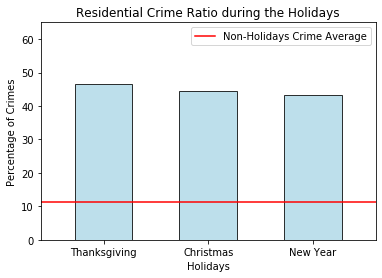

In [28]:
home_HDay_ratios = [Crimes_home_ThkgRate, Crimes_home_XmasRate, Crimes_home_Nyr]
home_average_ratios = [Crimes_home_Average]
x_axis = ["Thanksgiving", "Christmas", "New Year"]

# Setting our x and y limits
plt.xlim(-0.6, 2.6)
plt.ylim(0, 65)

plt.bar(x_axis, home_HDay_ratios, color='lightblue', alpha=0.8, edgecolor='black', align="center", width=0.55)

# Draw a default hline at y=1 that spans the xrange
plt.axhline(y=home_average_ratios, label = 'Non-Holidays Crime Average', c = 'red')

# The legend for chart
plt.title("Residential Crime Ratio during the Holidays")
plt.xlabel("Holidays")
plt.ylabel("Percentage of Crimes")

plt.legend(loc="upper right")
plt.savefig("Percentage_Crimes.png")
plt.show()